In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import optimize

from plotly.offline import iplot, plot
import plotly
import plotly.graph_objs as go

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25000 entries, 1 to 25000
Data columns (total 2 columns):
Height    25000 non-null float64
Weight    25000 non-null float64
dtypes: float64(2)
memory usage: 585.9 KB
None
         Height    Weight
Index                    
1      65.78331  112.9925
2      71.51521  136.4873
3      69.39874  153.0269
4      68.21660  142.3354
5      67.78781  144.2971
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


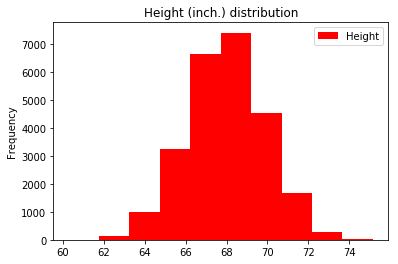

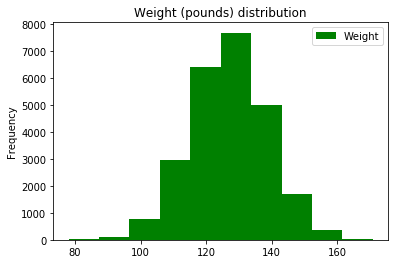

In [60]:
data=pd.read_csv("weights_heights.csv", index_col='Index')
print (data.info())
print (data.head())

print (data.plot(y='Height', kind='hist', color='red', title='Height (inch.) distribution'))
print (data.plot(y='Weight', kind='hist', color='green', title='Weight (pounds) distribution'))

         Height    Weight        BMI
Index                               
1      65.78331  112.9925  18.355808
2      71.51521  136.4873  18.760773
3      69.39874  153.0269  22.336747
4      68.21660  142.3354  21.502458
5      67.78781  144.2971  22.075458


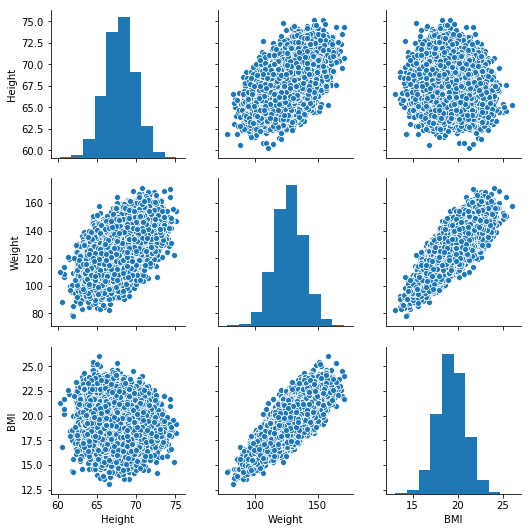

In [8]:
data['BMI']=data.Weight/((data.Height)**2)*703
print (data.head())
print (sns.pairplot(data))

         Height    Weight        BMI  weight_category
Index                                                
1      65.78331  112.9925  18.355808                1
2      71.51521  136.4873  18.760773                2
3      69.39874  153.0269  22.336747                3
4      68.21660  142.3354  21.502458                2
5      67.78781  144.2971  22.075458                2
AxesSubplot(0.125,0.125;0.775x0.755)


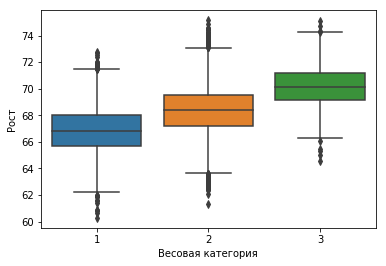

In [9]:
weight_category=[]
for elem in data['Weight']:
    if elem < 120:
        weight_category.append(1)
    elif elem >=150:
        weight_category.append(3)
    else:
        weight_category.append(2)
data['weight_category']=weight_category      
print (data.head())
weight_category_and_Height=sns.boxplot(data=data, x='weight_category', y='Height')
weight_category_and_Height.set(ylabel = 'Рост', xlabel = 'Весовая категория')
print (weight_category_and_Height)

AxesSubplot(0.125,0.125;0.775x0.755)


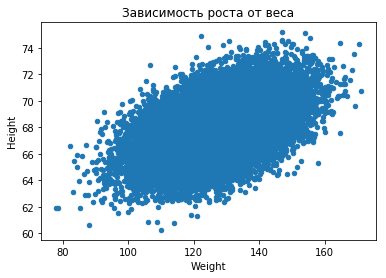

In [10]:
Weight_and_Height=data.plot(kind='scatter', x='Weight', y='Height', title='Зависимость роста от веса')
print (Weight_and_Height)

In [51]:
def get_y(w0, w1,x):
    return(w0+w1*x)
def get_error(w0,w1):
    return (sum(map(lambda x, y: (y-get_y(w0, w1,x))**2, data['Weight'], data['Height'])))

None


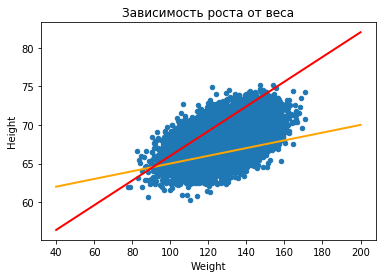

In [61]:
def make_model_plot(w_values):
    data.plot(kind='scatter', x='Weight', y='Height', title='Зависимость роста от веса')
    x_range=np.linspace(40,200,100)
    colors=['red', 'orange']
    for w0, w1 in w_values:
        y=list(map(lambda x: get_y(w0, w1,x), x_range))
        color = colors.pop()
        plt.plot(x_range, y,color=color, lw=2)
print (make_model_plot([(60, 0.05), (50, 0.16)]))

In [57]:
# w0=50
# w1=np.linspace(-5,7,100)
# error=list(map(lambda p: get_error(w0,p), w1))
# plt.plot(w0, w1)

0.14109203728833175


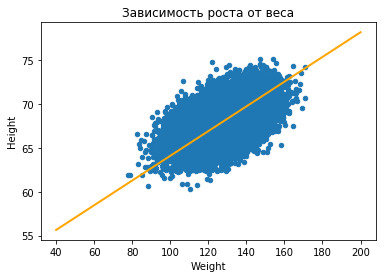

In [66]:
w0=50
w1_opt=optimize.minimize_scalar(lambda x: get_error(w0,x), [-5,5]).x
print (w1_opt)
make_model_plot([(w0, w1_opt)])

57.57171454428976 0.0820069703119935


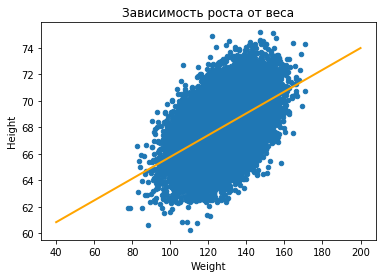

In [71]:
def get_error_opt(w):
    return get_error(w[0], w[1])

w0_opt, w1_opt = optimize.minimize(get_error_opt, (0,0), bounds = [(-100, 100), (-5, 5)], method = 'L-BFGS-B').x
print (w0_opt, w1_opt)
make_model_plot([(w0_opt, w1_opt)])